Projeto 1: Ciência dos Dados



 Nome: Matheus Freitas

IEA - International Energy Agency

A Agência Nacional de Energia tem como foco principal obter máxima eficiência ao produzir energia. Mesmo que sua missão
atualmente é mais complexa, abrangendo um escopo maior de problemas a serem resolvidos. Neste Projeto 1, analisaremos se
a agência atingiu suas metas estabelecidas logo no início de sua fundação, em 1974. Tais metas tratavam basicamente sobre
a tentativa de estabilizar/aumentar a produção de energia, principalmente a que utilizava o óleo como principal matéria-prima.

Assim, a pergunta principal é: Os países membros tiveram uma otimização ou melhora na produção de energia total por ano ao
ingressar na IEA?

In [16]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as math

In [17]:
import os
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\matfs\Desktop\Ciência dos Dados\P1-Ciencia-dos-dados\Projeto 1


Primeiro, vamos ler os documentos baixados (OBS: alguns ainda serão utilizados, este é apenas um protótipo sujo) e listar os países da nossa análise exploratória (amostra), cuja escolha teve como critério principal ser um país-membro da IEA e ter uma natureza socioeconômica que difere da do restante do grupo.

In [18]:
energy_produce = pd.read_excel("energy produce total.xlsx")
energy_produce_idx = energy_produce.set_index('Energy production, total (toe)')

energy_use = pd.read_excel("energy use total.xlsx")
energy_use_idx = energy_use.set_index("Energe use, total (toe)")

oil_consumption = pd.read_excel("Oil consumption.xls.xlsx")
oil_consumption_idx = oil_consumption.set_index("Oil Consumption total (tonnes per year)")

oil_production = pd.read_excel("Oil Production.xls.xlsx")
oil_production_idx = oil_production.set_index("Crude oil production, total (toe)")

oil_proved_reserves = pd.read_excel("Oil Proved reserves.xls.xlsx")
oil_proved_reserves_idx = oil_proved_reserves.set_index("Oil proved reserves total (tonnes)")

lista_membros = ['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kngdom', 'United States']
lista_membros1 = ['Australia', 'Canada', 'Denmark', 'Italy', 'Mexico', 'Norway', 'United States']

lista_ano = ["1975", "1976", "1977", "1978", "1979", "1980"]

Agora, vamos analisar os dados do total de energia produzida no ano de 1975 por cada país escolhido para que
possamos ter uma noção de escala quando analisarmos os dados. O DataFrame abaixo explicita a frequência relativa
do total de energia produzida de cada país.

In [4]:
enerprod = energy_produce_idx.loc[lista_membros1, lista_ano]
enerprod_1975 = enerprod.loc[:, ['1975']]
soma_total = enerprod_1975['1975'].sum()
enerprod_1975['1975'] = enerprod_1975['1975']/soma_total*100
enerprod_1975

,1975
"Energy production, total (toe)",
Australia,4.233113
Canada,10.591202
Denmark,0.029726
Italy,1.184802
Mexico,3.559304
Norway,0.910463
United States,79.491390


Text(0.5, 1.0, 'Frequência Relativa de Energia produzida  por país (1975)')

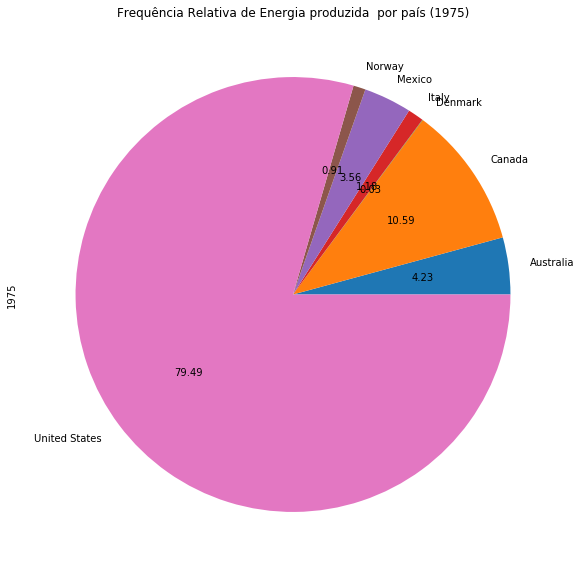

In [5]:
enerprod_1975['1975'].plot.pie(autopct="%.2f", figsize = (10,10));
plt.title("Frequência Relativa de Energia produzida  por país (1975)")

In [6]:
#eneruse = energy_use_idx.loc[lista_membros1, lista_ano]
#eneruse

Vamos repetir o processo para a produção total de óleo por ano de cada país.

In [7]:
oilprod = oil_production_idx.loc[lista_membros1, [1975, 1976, 1977, 1978, 1979, 1980]]
oilprod_1975 = oilprod.loc[:, [1975]]
soma_total = oilprod_1975[1975].sum()
oilprod_1975[1975] = oilprod_1975[1975]/soma_total*100
oilprod_1975


,1975
"Crude oil production, total (toe)",
Australia,3.466485
Canada,13.078502
Denmark,0.023438
Italy,0.197999
Mexico,6.437733
Norway,1.478597
United States,75.317245


Text(0.5, 1.0, 'Frequência Relativa de Óleo produzido por país (1975)')

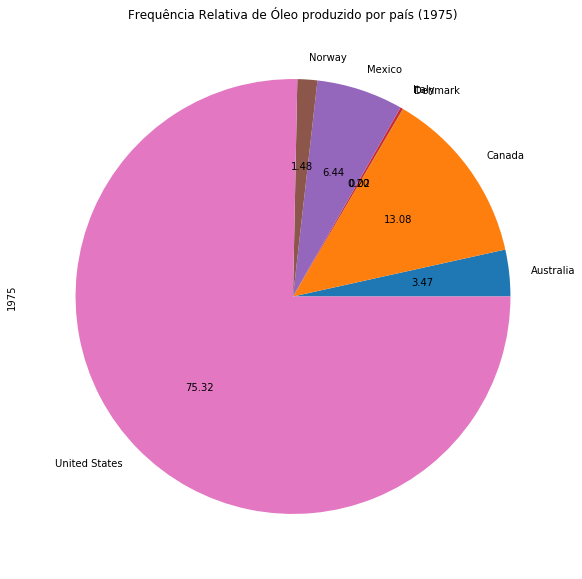

In [8]:
oilprod_1975[1975].plot.pie(autopct="%.2f", figsize = (10, 10));
plt.title('Frequência Relativa de Óleo produzido por país (1975)')


Após analisar os dados acima, percebe-se que os valores das frequências relativas do total de energia produzida se assemelha muito àqueles do total de óleo produzido, indicando que essas variáveis tem uma correlação. Para confirmar essa hipótese, vamos fazer um gráfico de dispersão:

In [9]:
#oilreser = oil_proved_reserves_idx.loc[lista_membros1, [1980, 1981, 1982, 1983, 1984, 1985]]
#oilreser

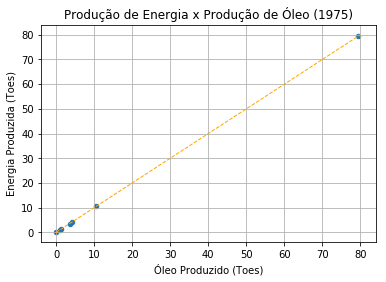

In [10]:
dados = oilprod_1975.join(enerprod_1975, how='inner', lsuffix ='_oil', rsuffix ='_energy')

plot = dados.plot.scatter(x="1975", y="1975")

def func (x):
    y=x
    return y

solucao=[]
lista_tempo = np.arange(0, 80, 1e-3)
for i  in lista_tempo:
    solucao.append(func(i))


plt.plot(lista_tempo,solucao,  color = 'orange', linestyle="dashed", linewidth=1)
plt.title("Produção de Energia x Produção de Óleo (1975)")
plt.xlabel("Óleo Produzido (Toes)")
plt.ylabel("Energia Produzida (Toes)")
plt.grid()
plt.show(True)




Ao traçarmos uma reta com inclinação de 45 graus (NÃO é a linha de tendência), podemos visualizar que o quanto mais próximo os pontos estiverem da reta, maior a influência a produção total de óleo anualmente exerce sobre o total de energia produzido. A hipótese citada previamente foi confirmada para todos os países da amostra.

Após confirmar que energia total e produção de óleo estavam altamente correlacionados à época, agora iremos analisar como essas duas
variáveis se comportaram nos anos subsequentes, primeiro em um período de 5 anos e logo em seguida em um período de 25 anos.

Text(0.5, 0, 'País')

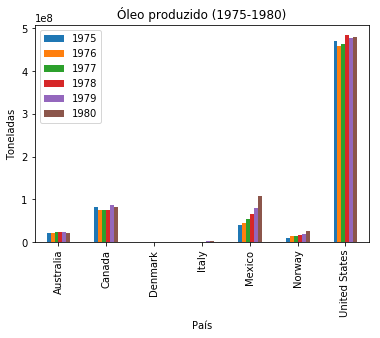

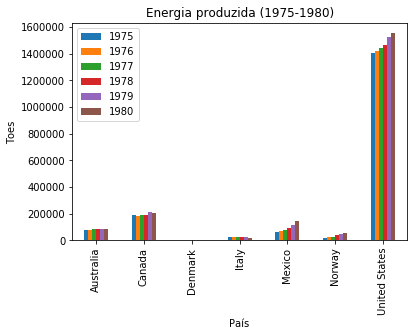

In [11]:
oilprod.plot(kind='bar')
plt.title("Óleo produzido (1975-1980)")
plt.ylabel("Toneladas")
plt.xlabel("País")

enerprod.plot(kind='bar')
plt.title("Energia produzida (1975-1980)")
plt.ylabel("Toes")
plt.xlabel("País")

Text(0, 0.5, 'Toes')

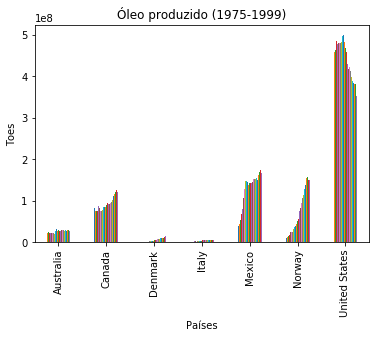

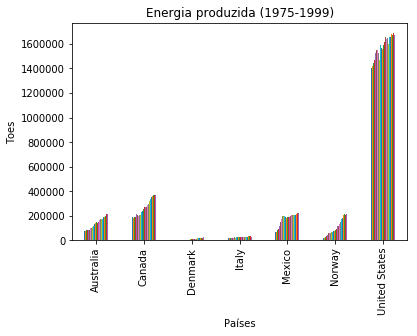

In [12]:
lista_anos1 = []
lista_anos2 = []
k=1974
for i in range (0, 25):
    k+=1
    lista_anos1.append(k)
    lista_anos2.append(k)
    lista_anos2[i] = str(lista_anos2[i])

enerprod_19 = energy_produce_idx.loc[lista_membros1, lista_anos2]
oilprod_19 = oil_production_idx.loc[lista_membros1, lista_anos1]

oilprod_19.plot(kind='bar', legend = False)
plt.title("Óleo produzido (1975-1999)")
plt.xlabel("Países")
plt.ylabel("Toes")

enerprod_19.plot(kind='bar', legend = False)
plt.title("Energia produzida (1975-1999)")
plt.xlabel("Países")
plt.ylabel("Toes")



Como os valores produzidos pela Dinamarca e Itália são muito pequenos, vamos criar um novo gráfico de barras em que podemos ter uma visualização melhor dos dados.

Text(0.5, 0, 'Países')

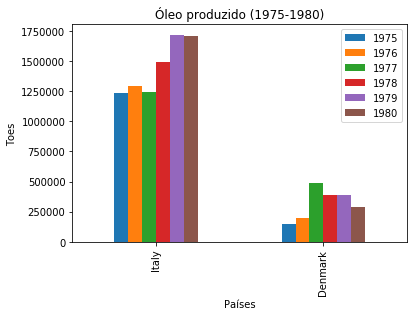

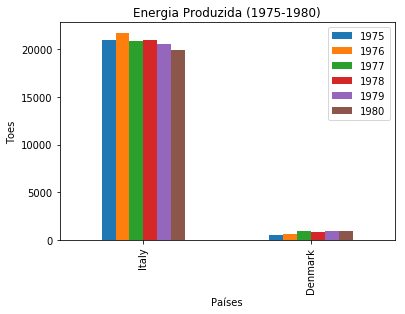

In [13]:
oilprod_italy_denmark = oilprod.loc[['Italy', 'Denmark'], :]
oilprod_italy_denmark.plot(kind='bar')
plt.title("Óleo produzido (1975-1980)")
plt.xlabel("Países")
plt.ylabel("Toes")

enerprod_italy_denmark = enerprod.loc[['Italy', 'Denmark'], :]
enerprod_italy_denmark.plot(kind="bar")
plt.title("Energia Produzida (1975-1980)")
plt.ylabel("Toes")
plt.xlabel("Países")

Text(0.5, 0, 'Países')

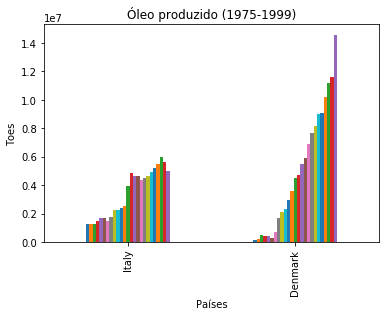

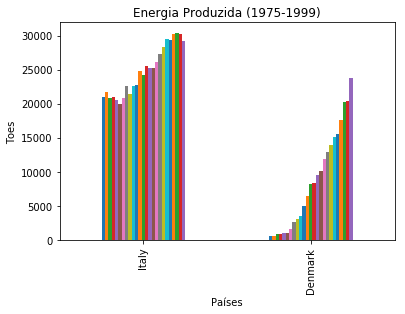

In [14]:
oilprod_italy_denmark = oil_production_idx.loc[['Italy', 'Denmark'], lista_anos1]
oilprod_italy_denmark.plot(kind='bar', legend = False)
plt.title("Óleo produzido (1975-1999)")
plt.xlabel("Países")
plt.ylabel("Toes")

enerprod_italy_denmark = energy_produce_idx.loc[['Italy', 'Denmark'], lista_anos2]
enerprod_italy_denmark.plot(kind="bar", legend = False)
plt.title("Energia Produzida (1975-1999)")
plt.ylabel("Toes")
plt.xlabel("Países")

Com a análise feita, podemos concluir que a resposta para a pergunta é que a IEA influenciou a produção de energia de todos os países de forma a aumentá-la ou estabiliza-la. Mesmo que a dimensão dos dados de cada país seja muito diferente, a proporcionalmente, os dados apresentam comportamento  similar. Portanto, é certo dizer que a IEA contribuiu para a produção de óleo a partir de 1974 e trouxe benefícios para a produção energética dos seus países-membros (exceto os EUA, que, talvez por ser um país com muitas matrizes energéticas, o óleo não foi tão vital para a energia total produzida, visto que mesmo com o declínio de sua produção, a energia ainda continuava a aumentar).

Por último, vamos comparar um país-membro da IEA (México) e outros não-participantes (restante) que possuíam características socioeconômicas
um pouco similares à época e eram do mesmo continente.

Text(0.5, 0, 'Países')

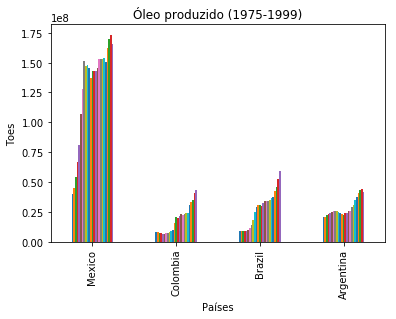

In [15]:
lista_anos3 = []
lista_anos4 = []
k=1974
for i in range (0, 25):
    k+=1
    lista_anos3.append(k)
    lista_anos4.append(k)
    lista_anos4[i] = str(lista_anos4[i])
    
oilprod_15_mex_arg = oil_production_idx.loc[['Mexico', 'Colombia', 'Brazil', 'Argentina'], lista_anos3]
oilprod_15_mex_arg.plot(kind='bar', legend = False)
plt.title ("Óleo produzido (1975-1999)")
plt.ylabel("Toes")
plt.xlabel("Países")

Fica claramente perceptível que os países não-participantes não crescerem muito na produção de óleo durante o período
que sucedeu a fundação do IEA (1974-1980) e que o crescimento do Mexico durante esse período foi muito mais acentuado. O crescimento
dos outros países nessa área ocorreu alguns anos mais tarde, provavlemente devido a outros fatores econômicos, confirmando que
o IEA influenciou seus países-membros.

Referências: https://www.iea.org/ - https://pt.wikipedia.org/wiki/Ag%C3%AAncia_Internacional_de_Energia
             